# Practical work 08 - Clustering

## Imports

In [166]:
import _pickle as pickle
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt

from sklearn.cluster import KMeans

## Exercise 4 - Optional : compare your implementation with the one of scikit-learn

Load et visualisation similaire à ex1 : 

In [167]:
fichier1 = open("dataset_1.pkl", "rb")
data1, label1 = pickle.load(fichier1, encoding="latin1")
fichier1.close()

fichier2 = open("dataset_2.pkl", "rb")
data2, label2 = pickle.load(fichier2, encoding="latin1")
fichier2.close()

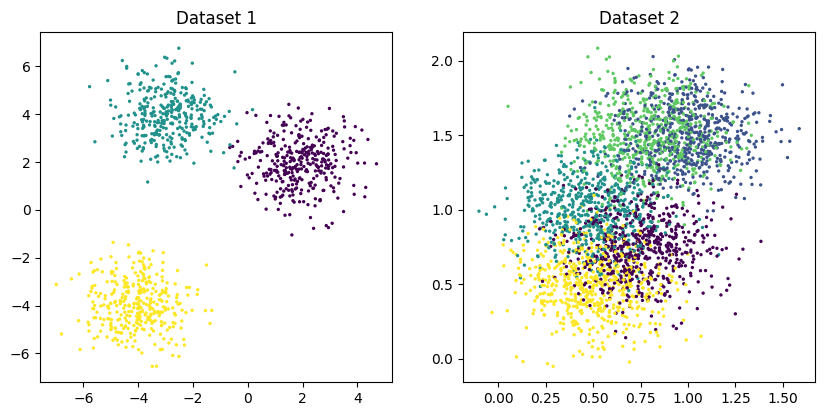

In [168]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.scatter(data1[:, 0], data1[:, 1], c=label1, s=2)
plt.title("Dataset 1")

plt.subplot(2, 2, 2)
plt.scatter(data2[:, 0], data2[:, 1], c=label2, s=2)
plt.title("Dataset 2")

plt.show()

Sur scikit-learn, on peut : "Running default k-Means" ce qui veut dire qu'on execute l'algorithme avec les paramètres par défaut : 

In [169]:
kmeans_1 = KMeans(n_clusters=3).fit(data1)
kmeans_2 = KMeans(n_clusters=5).fit(data2)

Visualizing the results : 

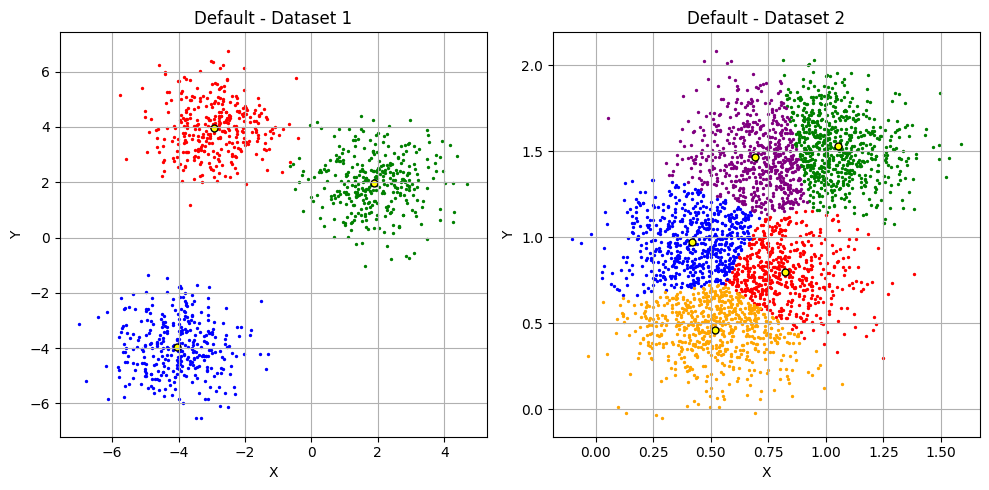

In [170]:
def plot_results(kmeans: KMeans, data: np.ndarray, title: str):
    couleurs = ['red', 'blue', 'green', 'orange', 'purple']

    labels = kmeans.predict(data)
    classes = np.unique(labels)

    for i, classe in enumerate(classes):
        indices = np.where(labels == classe)
        points = data[indices]
        plt.scatter(
            points[:, 0],
            points[:, 1],
            color=couleurs[i % len(couleurs)],
            s=2,
            label=f'Cluster {classe}'
        )

    centres = kmeans.cluster_centers_
    plt.scatter(
        centres[:, 0],
        centres[:, 1],
        color='yellow',
        marker='.',
        s=100,
        edgecolors='black',
        label='centroids'
    )

    plt.title(title)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.grid(True)



plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plot_results(kmeans_1, data1, "Default - Dataset 1")
plt.subplot(1, 2, 2)
plot_results(kmeans_2, data2, "Default - Dataset 2")
plt.tight_layout()
plt.show()

On voit qu'on obtient sensiblement les même résultats que lors de l'exercice précédent.

On peut aussi le lancer avec des "randoms centers". Ce paramètre permet de choisir les centroïdes initiaux totalement au hasard parmis les points du dataset et ensuite lancer l'algorithme K-means classique.

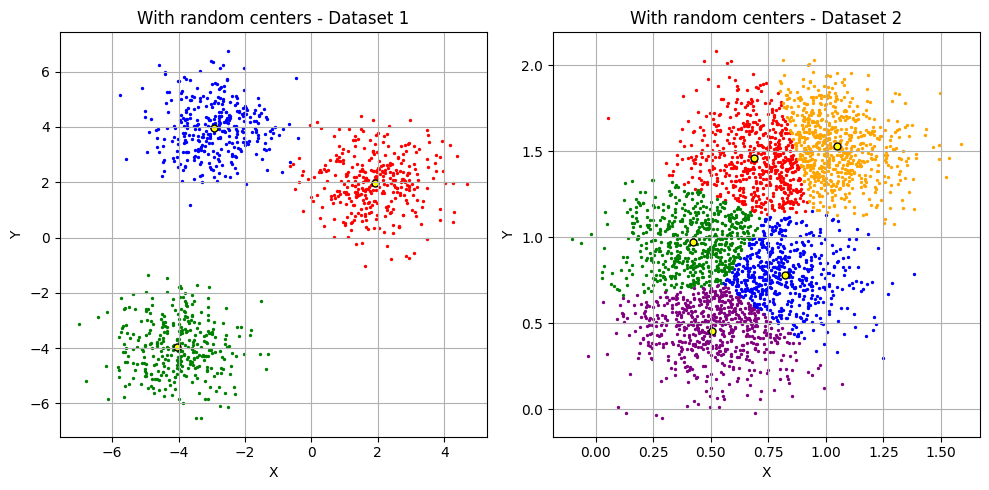

In [171]:
kmeans_1 = KMeans(n_clusters=3, init="random").fit(data1)
kmeans_2 = KMeans(n_clusters=5, init="random").fit(data2)


plt.figure(figsize=(10, 5))


plt.subplot(1, 2, 1)
plot_results(kmeans_1, data1, "With random centers - Dataset 1")
plt.subplot(1, 2, 2)
plot_results(kmeans_2, data2, "With random centers - Dataset 2")

plt.tight_layout()
plt.show()

On voit qu'on obtient aussi globalement les mêmes résultats.

Afin obtenir des changements plus violent car la on ne voit pas trop la différence... On peut modifier le paramètre `n_init`, il définit le nombre d'exécutions avec différents centroïdes que l'algorithme effectuera. L'idée est de faire une seule exécution, comme ça on peut plus facilement voir les résultats de nos modifications apportées à l'algorithme.


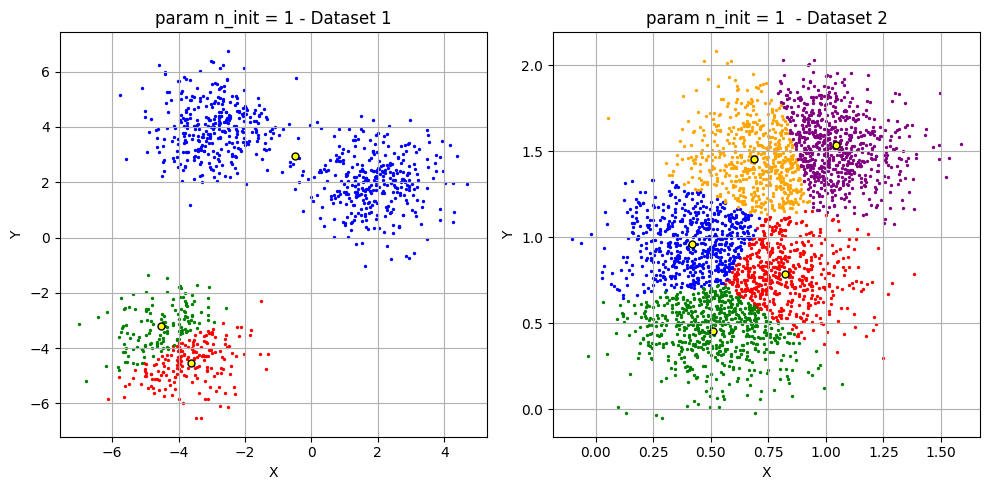

<Figure size 640x480 with 0 Axes>

In [172]:
kmeans_n1 = KMeans(n_clusters=3, init="random", n_init=1).fit(data1)
kmeans_n2 = KMeans(n_clusters=5, init="random", n_init=1).fit(data2)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plot_results(kmeans_n1, data1, "param n_init = 1 - Dataset 1")
plt.subplot(1, 2, 2)
plot_results(kmeans_n2, data2, "param n_init = 1  - Dataset 2")

plt.tight_layout()
plt.show()


plt.tight_layout()
plt.show()

On voit bien que cela peut changer le comportement et le "positionnement" des clusters.

On peut également modifier le paramètre de la tolérence :

En modifiant le paramètre « tol » et augmentant cette valeur, nous pouvons déclarer instantanément la convergence après la première itération, à des fins de test.

Le paramètre « tol » définit la tolérance utilisée pour déclarer la convergence.

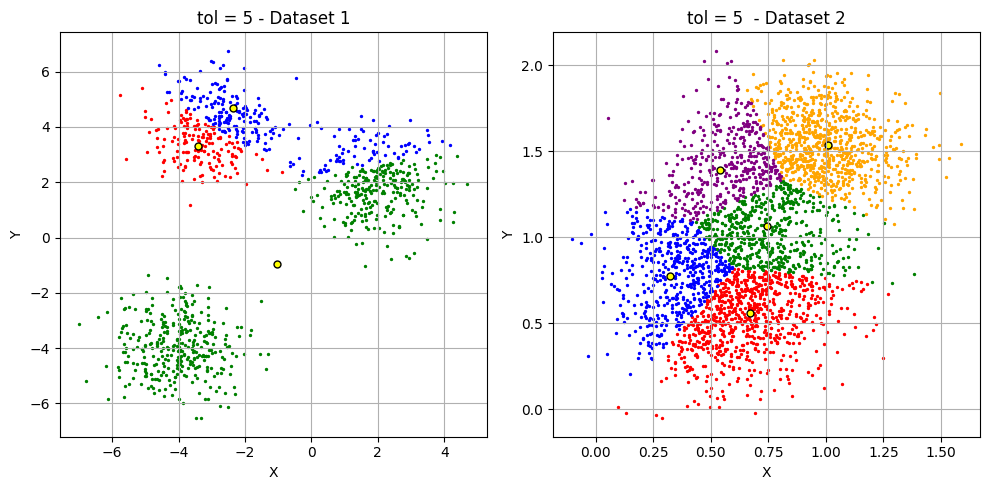

<Figure size 640x480 with 0 Axes>

In [176]:
kmeans_tol_1 = KMeans(n_clusters=3, init="random", n_init=1, tol=5).fit(data1)
kmeans_tol_2 = KMeans(n_clusters=5, init="random", n_init=1, tol=5).fit(data2)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plot_results(kmeans_tol_1, data1, "tol = 5 - Dataset 1")
plt.subplot(1, 2, 2)
plot_results(kmeans_tol_2, data2, "tol = 5  - Dataset 2")

plt.tight_layout()
plt.show()


plt.tight_layout()
plt.show()

En modifiant aussi le paramètre "max_iter" on peut limiter le nombre d'itérations et donc changer le comportement :

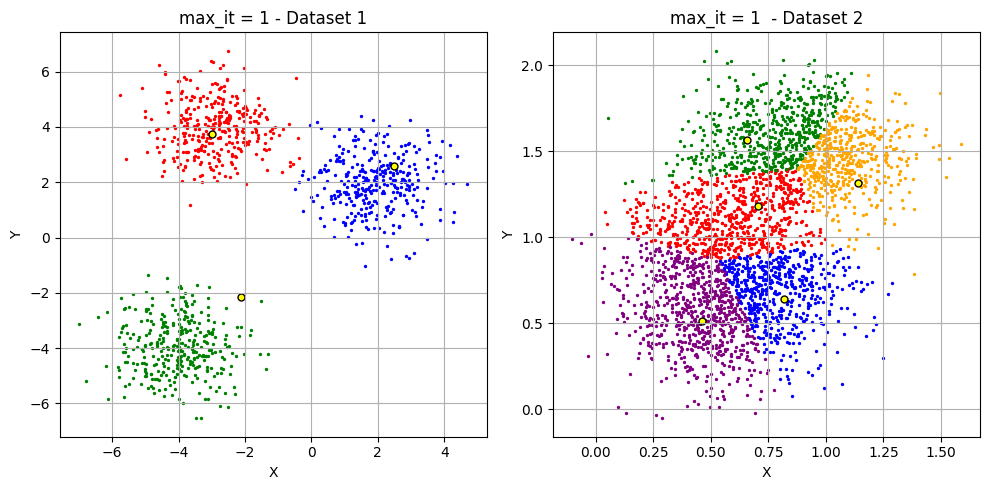

<Figure size 640x480 with 0 Axes>

In [174]:
kmeans_max1 = KMeans(n_clusters=3, init="random", n_init=1, max_iter=1).fit(data1)
kmeans_max2 = KMeans(n_clusters=5, init="random", n_init=1, max_iter=1).fit(data2)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plot_results(kmeans_max1, data1, "max_it = 1 - Dataset 1")
plt.subplot(1, 2, 2)
plot_results(kmeans_max2, data2, "max_it = 1  - Dataset 2")

plt.tight_layout()
plt.show()


plt.tight_layout()
plt.show()

En conclusion, scikit-learn permet converger de manière similaire à la nôtre. Il trouve les mêmes centroïdes. Par contre on peut modifier plusieurs paramètres utiles pour le débogage et la personnalisation, ce qui pourrait conduire à de meilleurs résultats dans des cas plus complexes.

Aussi un point intérésant de scikit-learn est qu'il utilise une stratégie d'initialisation « greedy k-means++ » pour sélectionner les centroïdes initiaux, ce qui contribue à accélérer la convergence.